# Chapter 1 - Statistical Decision Map

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Anscombe's Dataset
In 1973 Frank J. Anscombe presented four datasets descriptive statistics, but the distributions are very different.

In [5]:
df = pd.read_csv('datasets/anscombe.csv')

df.head()

,Dataset,x,y
0,A,10,8.04
1,A,8,6.95
2,A,13,7.58
3,A,9,8.81
4,A,11,8.33


In [6]:
anscombe_table = df.groupby('Dataset').agg({'x': ['mean', 'std'],
                                            'y': ['mean', 'std']})
anscombe_table.head()

x                   y          
        mean       std      mean       std
Dataset                                   
A        9.0  3.316625  7.500909  2.031568
B        9.0  3.316625  7.500909  2.031657
C        9.0  3.316625  7.500000  2.030424
D        9.0  3.316625  7.500909  2.030579

The mean and standard deviations of the four groups are the same.

In [12]:
df.groupby('Dataset').corr().round(2)

x     y
Dataset              
A       x  1.00  0.82
        y  0.82  1.00
B       x  1.00  0.82
        y  0.82  1.00
C       x  1.00  0.82
        y  0.82  1.00
D       x  1.00  0.82
        y  0.82  1.00

The correlation between the variables in each dataset is also the same.

In [14]:
df.head()

,Dataset,x,y
0,A,10,8.04
1,A,8,6.95
2,A,13,7.58
3,A,9,8.81
4,A,11,8.33


In [15]:
a = df[df['Dataset'] == 'A'].drop('Dataset', axis=1)
b = df[df['Dataset'] == 'B'].drop('Dataset', axis=1)
c = df[df['Dataset'] == 'C'].drop('Dataset', axis=1)
d = df[df['Dataset'] == 'D'].drop('Dataset', axis=1)

a.head()

,x,y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33


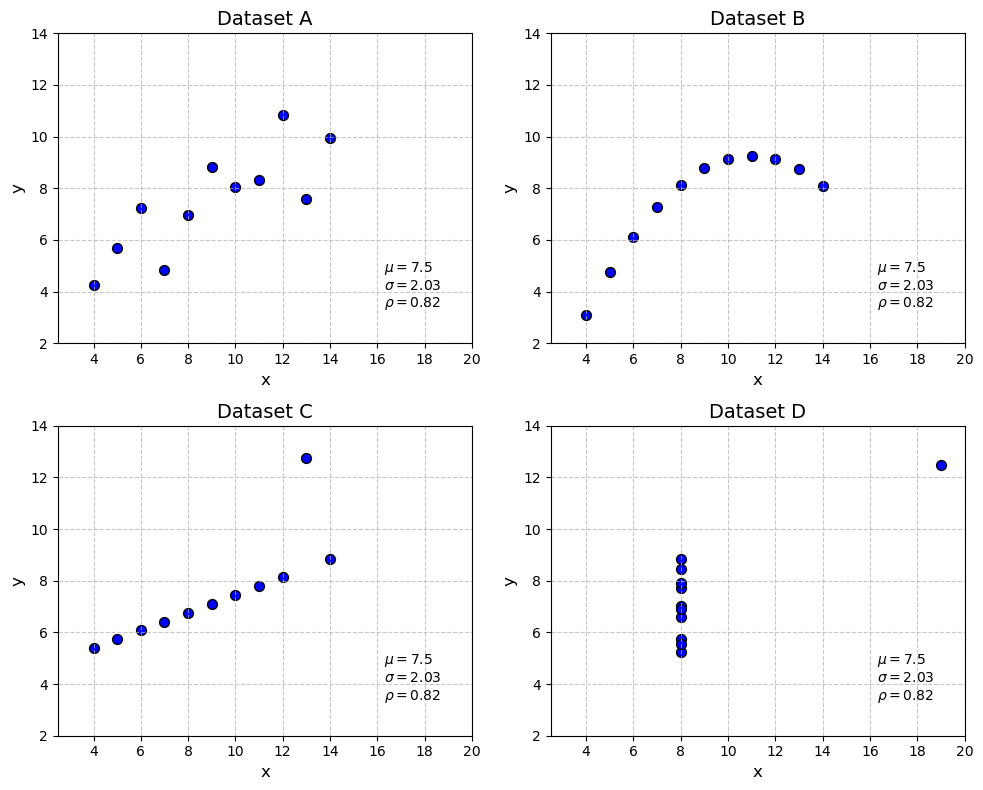

In [51]:
# Define the datasets (a, b, c, d)
datasets = {'Dataset A': a, 'Dataset B': b, 'Dataset C': c, 'Dataset D': d}

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through datasets and corresponding axes
for ax, (title, data) in zip(axes.ravel(), datasets.items()): # Loop over each axis and dataset (title + data)
    ax.scatter(data['x'],                                     # Plot 'x' values on the x-axis
               data['y'],                                     # Plot 'y' values on the y-axis
               color='blue',                                  # Fill points with blue color
               edgecolor='black',                             # Outline points with black edges
               label='Data Points',                           # Label for legend (not shown unless legend is added)
               s=50)                                          # Marker size set to 50
    ax.set_title(title, fontsize=14)                          # Set subplot title with font size 14
    ax.set_xlabel('x', fontsize=12)                           # Label x-axis as 'x' with font size 12
    ax.set_ylabel('y', fontsize=12)                           # Label y-axis as 'y' with font size 12
    ax.set_ylim(2,14)                                         # Set limits for y-axis
    ax.set_xlim(2.5,20)                                         # Set limits for x-axis
    ax.grid(visible=True, linestyle='--', alpha=0.7)          # Add dashed grid with transparency for readability
    #ax.legend(fontsize=10)                                   # Add legend

    # Add text with mean and std.dev in bottom-right corner
    ax.text(16.3, 3.2,
            r"$\mu = 7.5$" "\n" 
            r"$\sigma = 2.03$" "\n" 
            r"$\rho = 0.82$",
            fontsize=10, ha='left', va='bottom')                   # Align text to left and bottom


plt.tight_layout()                        # Adjust layout to prevent overlapping
plt.savefig('images/chp1_anscombe.png');  # Save this image
plt.show();                               # Show the plot

### Boxplot

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


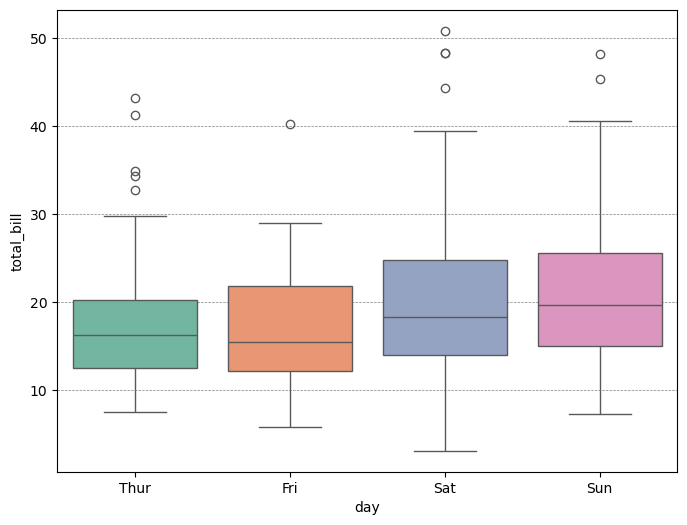

In [3]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Create a boxplot to visualize the distribution of total bills across days of the week
ax = sns.boxplot(
    x="day",                # Set the x-axis to the 'day' column, representing days of the week
    y="total_bill",         # Set the y-axis to the 'total_bill' column, representing the total bill amounts
    data=tips,              # Specify the dataset to use, which is the 'tips' DataFrame
    hue="day",              # Use the 'day' variable for coloring the boxplots
    palette="Set2"          # Specify a colorful palette
)

# Add horizontal grid lines for better readability
plt.grid(visible=True, axis="y", linestyle="--", linewidth=0.5, color="grey")  

plt.show()                  # Display the boxplot